In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('E:\Mail Classifier and recommender\spam.csv', encoding='latin-1')

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\heyia\AppData\Local\Temp\ipykernel_34576\3875421181.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('E:\Mail Classifier and recommender\spam.csv', encoding='latin-1')


In [42]:
df.head()

,target,text,num_char,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [5]:
df = df.drop(columns = ['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'], axis =1)

In [41]:
df.head()

,target,text,num_char,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [7]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [40]:
df.head()

,target,text,num_char,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])


In [39]:
df.head()

,target,text,num_char,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [12]:
df = df.drop_duplicates()

<Axes: xlabel='target', ylabel='count'>

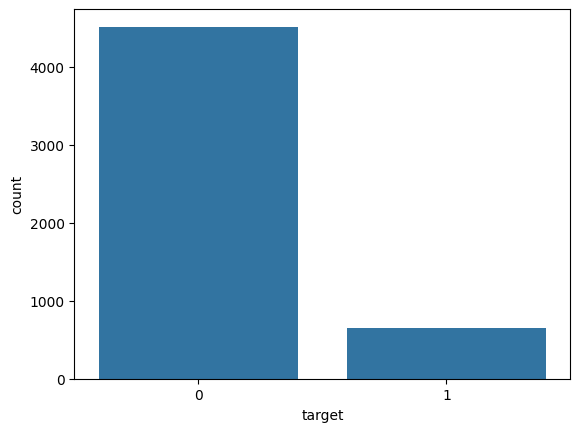

In [13]:
sns.countplot(x = df['target'])

In [14]:
import nltk #natural language toolkit


In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\heyia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df['num_char'] = df['text'].apply(lambda x: len(x))
df['num_word'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\heyia\AppData\Local\Temp\ipykernel_34576\2352216951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char'] = df['text'].apply(lambda x: len(x))
C:\Users\heyia\AppData\Local\Temp\ipykernel_34576\2352216951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_word'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
C:\Users\heyia\AppData\Local\Temp\ipykernel_34576\2352216951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [17]:
df.head(10)

,target,text,num_char,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
6,0,Even my brother is not like to speak with me. ...,77,18,2
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3


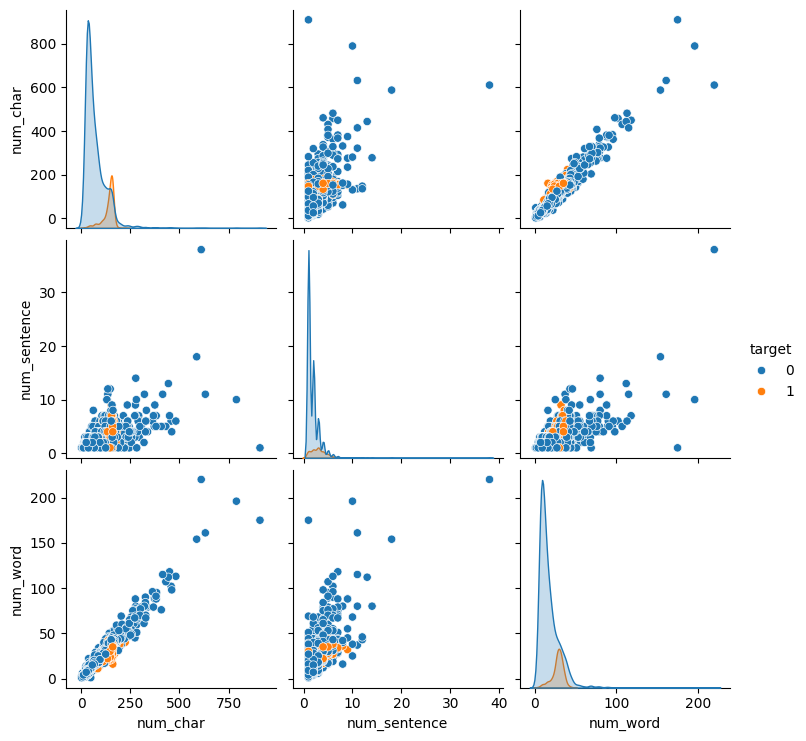

In [18]:
sns.pairplot(df[['num_char', 'num_sentence', 'num_word' , 'target']], hue = 'target')

In [19]:
df[['num_char', 'num_sentence', 'num_word' , 'target']].corr()

,num_char,num_sentence,num_word,target
num_char,1.000000,0.624139,0.965760,0.384717
num_sentence,0.624139,1.000000,0.679971,0.263939
num_word,0.965760,0.679971,1.000000,0.262912
target,0.384717,0.263939,0.262912,1.000000


<Axes: >

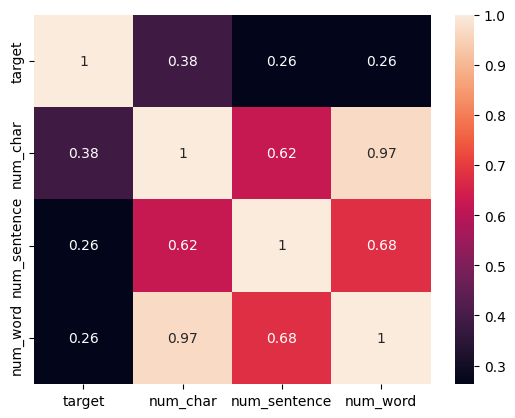

In [20]:
#heatmap
sns.heatmap(df[[ 'target', 'num_char', 'num_sentence', 'num_word']].corr(), annot=True)

<font size = 5>Comparetively num_char has the best corr with target (0.38), we should use only num_char in our training model (as there is so much inter correlation within independent variable) </font>

In [21]:
from wordcloud import WordCloud
wc = WordCloud()

In [22]:
wc.generate(df[df['target']==1]['text'].str.cat(sep=' '))

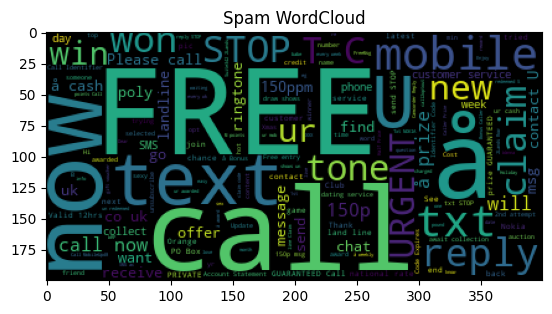

In [23]:
plt.title("Spam WordCloud")
plt.imshow(wc)

In [24]:
wc.generate(df[df['target']==0]['text'].str.cat(sep=' '))

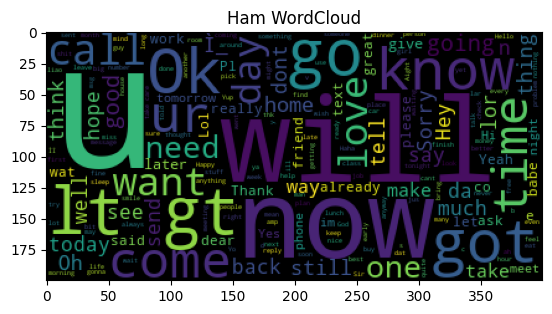

In [25]:
plt.title('Ham WordCloud')
plt.imshow(wc)

In [26]:
spam_text_list = df[df['target']==1]['text'].tolist()

In [27]:
spam_corpus=[]
for msg in spam_text_list:
    splitted = msg.split()
    for word in splitted:
        spam_corpus.append(word)


In [28]:
from collections import Counter

In [29]:
spam_count = Counter(spam_corpus)

In [30]:
pd.DataFrame(spam_count.items(), columns = ['words', 'count'])

,words,count
0,Free,29
1,entry,20
2,in,54
3,2,151
4,a,314
...,...,...
4307,"name,",1
4308,house,1
4309,å£750,1
4310,087187272008,1


In [31]:
df_spam = pd.DataFrame(spam_count.most_common(30),columns = ['words', 'count'])
#can also use
#pd.DataFrame(data = spam_count.items(),columns = ['words', 'count'])[:30]
#

In [32]:
df_spam.head(5)

,words,count
0,to,522
1,a,314
2,your,171
3,call,163
4,the,160


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'to'),
  Text(1, 0, 'a'),
  Text(2, 0, 'your'),
  Text(3, 0, 'call'),
  Text(4, 0, 'the'),
  Text(5, 0, 'or'),
  Text(6, 0, 'for'),
  Text(7, 0, '2'),
  Text(8, 0, 'you'),
  Text(9, 0, 'is'),
  Text(10, 0, 'Call'),
  Text(11, 0, 'on'),
  Text(12, 0, 'have'),
  Text(13, 0, 'from'),
  Text(14, 0, 'and'),
  Text(15, 0, '&'),
  Text(16, 0, 'with'),
  Text(17, 0, 'ur'),
  Text(18, 0, 'of'),
  Text(19, 0, 'FREE'),
  Text(20, 0, '4'),
  Text(21, 0, 'mobile'),
  Text(22, 0, 'our'),
  Text(23, 0, 'You'),
  Text(24, 0, 'are'),
  Text(25, 0, 'To'),
  Text(26, 0, 'Your'),
  Text(27, 0, 'claim'),
  Text(28, 0, 'text'),
  Text(29, 0, 'U')])

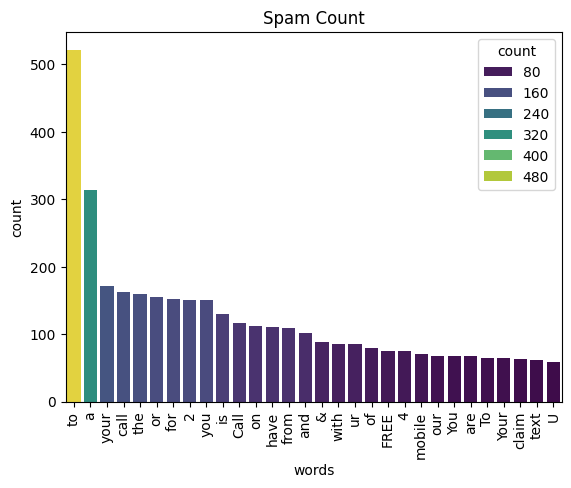

In [33]:
sns.barplot(data = df_spam, x ='words', y = 'count', palette='viridis', hue='count')
plt.title("Spam Count")
plt.xticks(rotation = 'vertical')

In [34]:
ham_text_list = df[df['target']== 0]['text'].tolist()

In [35]:
ham_list=[]
for msg in ham_text_list:
    for words in msg.split():
        ham_list.append(words)


In [36]:
df_ham = pd.DataFrame(Counter(ham_list).most_common(30), columns = ['words', 'count'])[:30][:]
df_ham.head(5)

,words,count
0,to,1450
1,you,1412
2,I,1349
3,the,954
4,a,884


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'to'),
  Text(1, 0, 'you'),
  Text(2, 0, 'I'),
  Text(3, 0, 'the'),
  Text(4, 0, 'a'),
  Text(5, 0, 'i'),
  Text(6, 0, 'and'),
  Text(7, 0, 'in'),
  Text(8, 0, 'u'),
  Text(9, 0, 'my'),
  Text(10, 0, 'is'),
  Text(11, 0, 'me'),
  Text(12, 0, 'for'),
  Text(13, 0, 'of'),
  Text(14, 0, 'that'),
  Text(15, 0, 'it'),
  Text(16, 0, 'your'),
  Text(17, 0, 'have'),
  Text(18, 0, 'on'),
  Text(19, 0, 'at'),
  Text(20, 0, 'be'),
  Text(21, 0, 'are'),
  Text(22, 0, 'not'),
  Text(23, 0, 'get'),
  Text(24, 0, '2'),
  Text(25, 0, 'can'),
  Text(26, 0, "I'm"),
  Text(27, 0, 'so'),
  Text(28, 0, 'but'),
  Text(29, 0, 'will')])

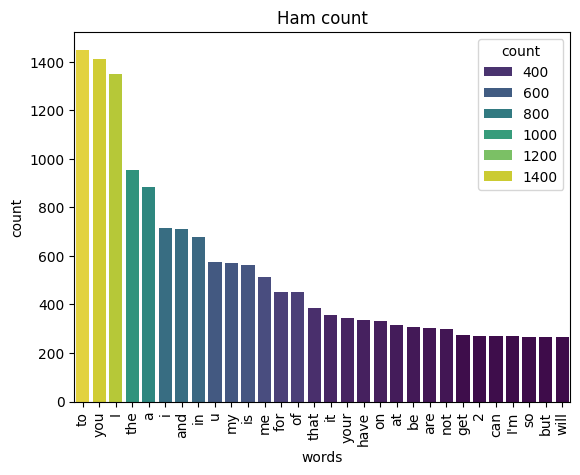

In [37]:
sns.barplot(data = df_ham, x = 'words', y = 'count', palette='viridis', hue='count')
plt.title("Ham count")
plt.xticks(rotation = 'vertical')

In [38]:
#eda done